# Clustering Countries by Nutrient Distributions

This notebook explores clustering countries based on their nutrient intake profiles using the dataset `country_nutrient_totals.csv`. The goal is to identify groups of countries with similar nutrient distributions.

## 1. Import Required Libraries

We will use pandas, numpy, matplotlib, seaborn, scikit-learn, and other necessary libraries for data analysis and clustering.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 2. Load and Inspect Data

Let's load the country nutrient totals dataset and inspect its structure, basic statistics, and a few sample rows.

In [2]:
# Load the dataset
df = pd.read_csv("../data/country_nutrient_totals.csv")

# Display shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Show first 5 rows
df.head()

Shape: (177, 14)
Columns: ['Area', 'Calories', 'Protein', 'Fat', 'Saturated Fat', 'Carbohydrates', 'Sugar', 'Fiber', 'Sodium', 'Calcium', 'Iron', 'Vitamin A', 'Vitamin C', 'Vitamin D']


,Area,Calories,Protein,Fat,Saturated Fat,Carbohydrates,Sugar,Fiber,Sodium,Calcium,Iron,Vitamin A,Vitamin C,Vitamin D
0,Afghanistan,1915.5653,65.7858,40.2633,17.34534,327.0947,28.733770,19.43860,877.19380,316.6948,15.3882,471.0831,36.1714,0.0664
1,Albania,2511.4206,102.0006,85.6128,29.63142,338.5902,91.407030,23.60592,4586.34540,1211.1918,15.8106,1002.9006,230.4198,1.4430
2,Algeria,2744.0532,89.1567,79.7121,18.58950,430.7823,91.000260,28.02924,2629.23570,639.8595,18.9054,704.1735,169.4925,0.6561
3,Angola,1824.4534,37.9610,39.6781,14.22036,325.7100,34.219185,13.46576,740.12785,241.3796,7.1918,170.1854,171.8409,0.2695
4,Antigua and Barbuda,2087.9400,97.3930,74.5705,30.95955,250.3080,65.222625,17.78540,3310.37175,641.1805,14.6965,1048.7980,265.2850,2.3545


In [3]:
# Display basic statistics
df.describe()

,Calories,Protein,Fat,Saturated Fat,Carbohydrates,Sugar,Fiber,Sodium,Calcium,Iron,Vitamin A,Vitamin C,Vitamin D
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,2301.552679,79.463601,73.366396,26.409583,331.112155,61.902269,18.687301,2954.341568,546.837355,14.400996,738.985468,132.686750,1.178070
std,389.688058,24.206367,25.278694,10.772551,61.099339,21.265805,5.709806,2110.631408,269.407416,4.261519,450.911723,73.545898,0.704116
min,1218.545200,22.072500,17.220600,4.573800,171.401600,13.973310,6.842880,418.964700,117.490500,4.463100,58.765500,20.703600,0.030800
25%,2060.734200,61.592400,54.033000,17.890650,293.649300,46.454200,14.226200,1283.682750,332.160000,11.312900,363.978500,90.898200,0.486000
50%,2337.006100,80.153100,72.126600,25.482150,331.702800,62.925070,18.195840,2374.912750,485.503000,14.442000,683.100600,115.724700,1.300500
75%,2601.809100,97.694100,90.312500,35.401860,368.023500,76.142430,23.075280,4276.981800,763.074000,17.277300,1008.477600,151.538000,1.709100
max,3035.362200,143.857500,139.651200,54.152280,502.734600,120.975400,33.986160,9989.643300,1323.979800,26.863200,2280.259800,499.200000,2.677500


## 3. Preprocess Data (Handle Missing Values, Scaling)

We will check for missing values, handle them if present, and scale the nutrient features for clustering.

In [5]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Select nutrient columns (exclude 'Area')
nutrient_cols = df.columns.drop('Area')
X = df[nutrient_cols]
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing values per column:
 Area             0
Calories         0
Protein          0
Fat              0
Saturated Fat    0
Carbohydrates    0
Sugar            0
Fiber            0
Sodium           0
Calcium          0
Iron             0
Vitamin A        0
Vitamin C        0
Vitamin D        0
dtype: int64


## 4. Dimensionality Reduction (PCA)

To visualize and cluster effectively, we'll reduce the dimensionality of the nutrient features using Principal Component Analysis (PCA).

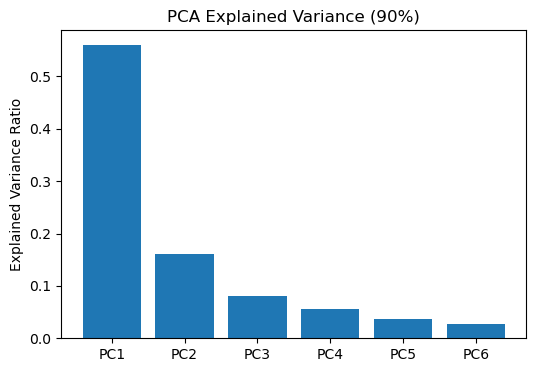

In [6]:
# Apply PCA to capture 90% of variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance for each component
plt.figure(figsize=(6,4))
plt.bar([f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance (90%)')
plt.show()

## 5. Clustering (KMeans)

We will use KMeans clustering to group countries by nutrient distributions. The optimal number of clusters will be determined using the elbow method.

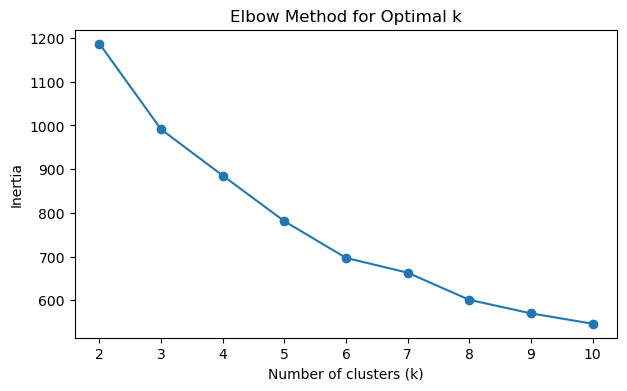

In [7]:
# Elbow method to find optimal number of clusters
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Choose optimal k (e.g., 4) based on elbow plot
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

## 6. Visualize Clusters

Let's plot the countries in PCA-reduced space, color-coded by their cluster assignments.

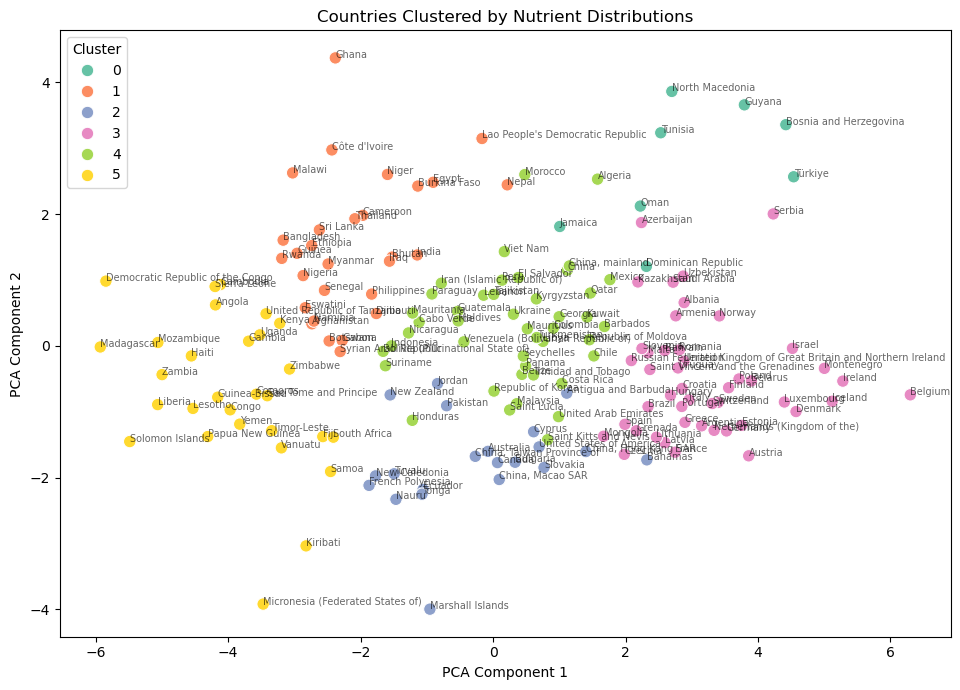

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=80)
for i, country in enumerate(df['Area']):
    plt.text(X_pca[i,0], X_pca[i,1], country, fontsize=7, alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Countries Clustered by Nutrient Distributions')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## 7. Analyze Cluster Membership

We will list the countries in each cluster and summarize the nutrient characteristics for each group.

In [10]:
# List countries in each cluster
for cluster_id in sorted(df['Cluster'].unique()):
    countries = df[df['Cluster'] == cluster_id]['Area'].tolist()
    print(f"\nCluster {cluster_id} ({len(countries)} countries):")
    print(", ".join(countries))

# Summarize nutrient statistics per cluster
cluster_summary = df.groupby('Cluster')[nutrient_cols].mean()
print("\nAverage nutrient values per cluster:")
display(cluster_summary)


Cluster 0 (8 countries):
Bosnia and Herzegovina, Dominican Republic, Guyana, Jamaica, North Macedonia, Oman, Tunisia, Türkiye

Cluster 1 (29 countries):
Afghanistan, Bangladesh, Bhutan, Botswana, Burkina Faso, Cameroon, Côte d'Ivoire, Djibouti, Egypt, Eswatini, Ethiopia, Gabon, Ghana, Guinea, India, Iraq, Lao People's Democratic Republic, Malawi, Myanmar, Namibia, Nepal, Niger, Nigeria, Philippines, Rwanda, Senegal, Sri Lanka, Syrian Arab Republic, Thailand

Cluster 2 (21 countries):
Antigua and Barbuda, Australia, Bahamas, Bulgaria, Canada, China, Hong Kong SAR, China, Macao SAR, China, Taiwan Province of, Cyprus, Ecuador, French Polynesia, Jordan, Marshall Islands, Nauru, New Caledonia, New Zealand, Pakistan, Slovakia, Tonga, Tuvalu, United States of America

Cluster 3 (46 countries):
Albania, Argentina, Armenia, Austria, Azerbaijan, Bahrain, Belarus, Belgium, Brazil, Croatia, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Grenada, Hungary, Iceland, Ireland, Israel, It

,Calories,Protein,Fat,Saturated Fat,Carbohydrates,Sugar,Fiber,Sodium,Calcium,Iron,Vitamin A,Vitamin C,Vitamin D
Cluster,,,,,,,,,,,,,
0,2686.034288,96.664237,79.524575,28.307351,404.205188,95.835033,26.314410,3219.368994,783.474975,19.260613,1267.859363,351.874950,1.335538
1,2196.710686,59.741834,48.522062,15.072846,382.572510,47.261204,17.165312,1512.941560,338.458583,13.195883,513.542703,161.154238,0.355679
2,2033.680086,80.394310,80.448295,30.684617,246.654176,55.838454,15.059505,3413.750933,526.253124,12.969405,810.557071,109.463552,1.582062
3,2694.616152,105.491776,102.506578,36.613096,331.024513,74.930475,23.620555,5375.879265,866.752722,18.486887,1116.725680,123.080404,1.723372
4,2400.067725,84.308623,72.942402,25.471152,355.036086,70.882215,19.530957,2385.887827,523.010595,14.643598,676.711368,123.759448,1.427498
5,1721.356390,45.129266,45.804593,19.366026,284.488072,37.283431,11.627091,1011.376559,233.541593,8.453041,262.014983,89.352872,0.421072
